In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Feature-target split
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train a Decision Tree Classifier

In [5]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)
dt_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

# Evaluate Decision Tree

In [4]:
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)

print("Decision Tree Metrics")
print("----------------------")
print("Accuracy :", dt_accuracy)
print("Precision:", dt_precision)
print("Recall   :", dt_recall)
print("F1 Score :", dt_f1)


Decision Tree Metrics
----------------------
Accuracy : 0.9473684210526315
Precision: 0.9577464788732394
Recall   : 0.9577464788732394
F1 Score : 0.9577464788732394


# Visualize the Decision Tree

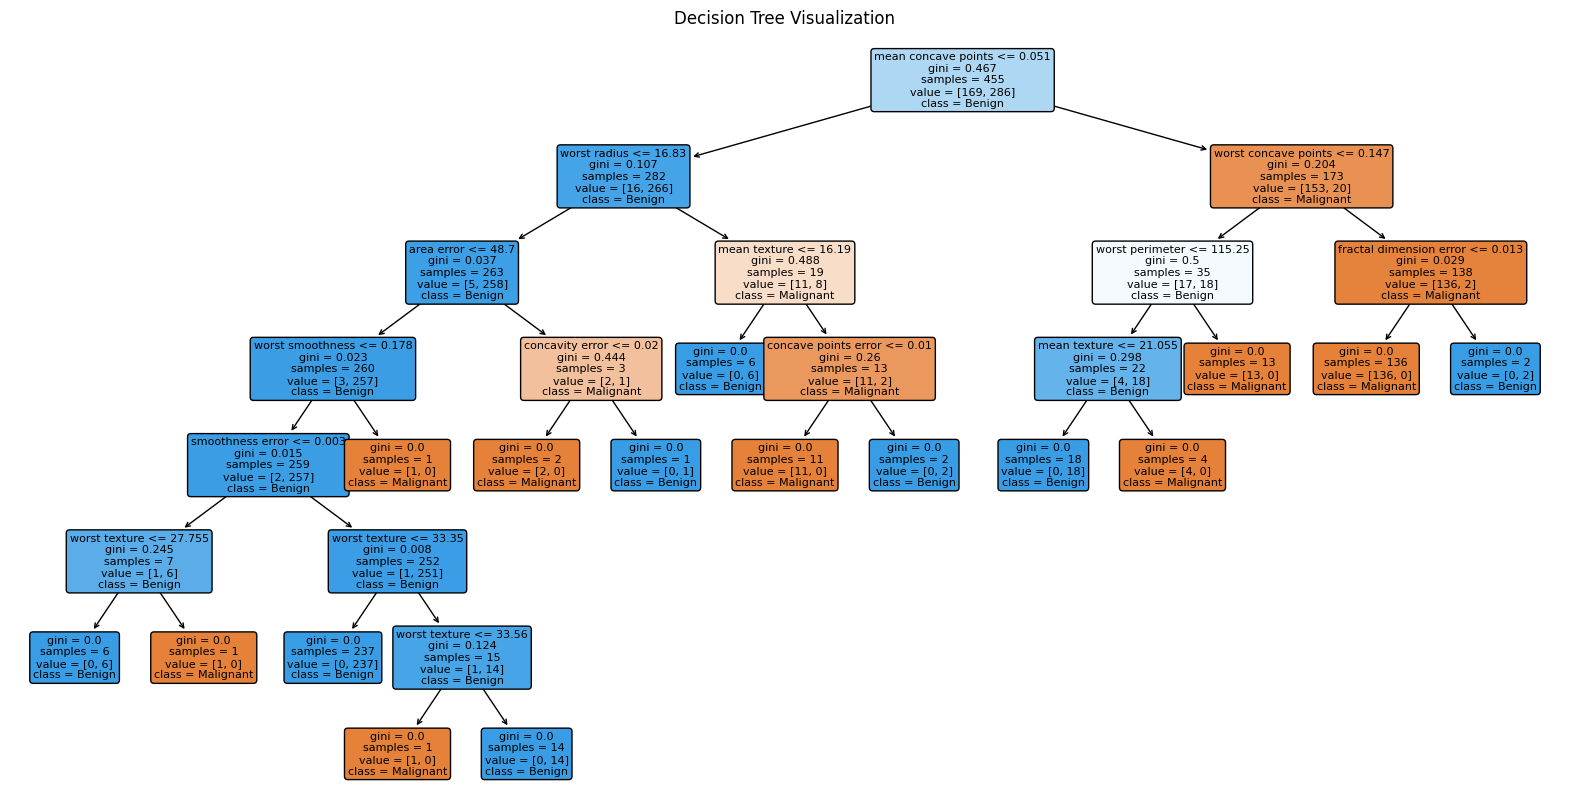

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Malignant", "Benign"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()


# Tune max_depth (Hyperparameter Tuning)

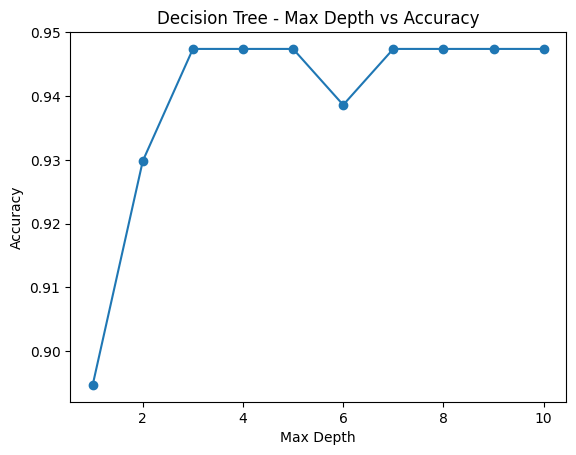

Best Max Depth: 3


In [7]:
depth_scores = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    depth_scores.append(acc)

# Plot depth vs accuracy
plt.plot(range(1, 11), depth_scores, marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree - Max Depth vs Accuracy")
plt.show()

best_depth = depth_scores.index(max(depth_scores)) + 1
print("Best Max Depth:", best_depth)


# Train Decision Tree with Best max_depth

In [9]:
dt_tuned = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_tuned.fit(X_train, y_train)
dt_tuned_preds = dt_tuned.predict(X_test)
dt_tuned_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

# Train a Random Forest Classifier

In [10]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=best_depth,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


# Evaluate Random Forest

In [11]:
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)

print("\nRandom Forest Metrics")
print("----------------------")
print("Accuracy :", rf_accuracy)
print("Precision:", rf_precision)
print("Recall   :", rf_recall)
print("F1 Score :", rf_f1)



Random Forest Metrics
----------------------
Accuracy : 0.9649122807017544
Precision: 0.958904109589041
Recall   : 0.9859154929577465
F1 Score : 0.9722222222222222


# Compare Decision Tree vs Random Forest

In [12]:
comparison_df = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dt_accuracy, rf_accuracy],
    "Precision": [dt_precision, rf_precision],
    "Recall": [dt_recall, rf_recall],
    "F1 Score": [dt_f1, rf_f1]
})

print("\nModel Comparison")
print(comparison_df)



Model Comparison
           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.947368   0.957746  0.957746  0.957746
1  Random Forest  0.964912   0.958904  0.985915  0.972222


# Extract Feature Importance (Random Forest)

In [13]:
importances = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features")
print(feature_importance_df.head(10))



Top 10 Important Features
                 Feature  Importance
22       worst perimeter    0.141266
27  worst concave points    0.138071
23            worst area    0.136338
7    mean concave points    0.127099
20          worst radius    0.071418
6         mean concavity    0.059014
0            mean radius    0.054277
3              mean area    0.045705
2         mean perimeter    0.042537
26       worst concavity    0.042276


# Plot Feature Importance

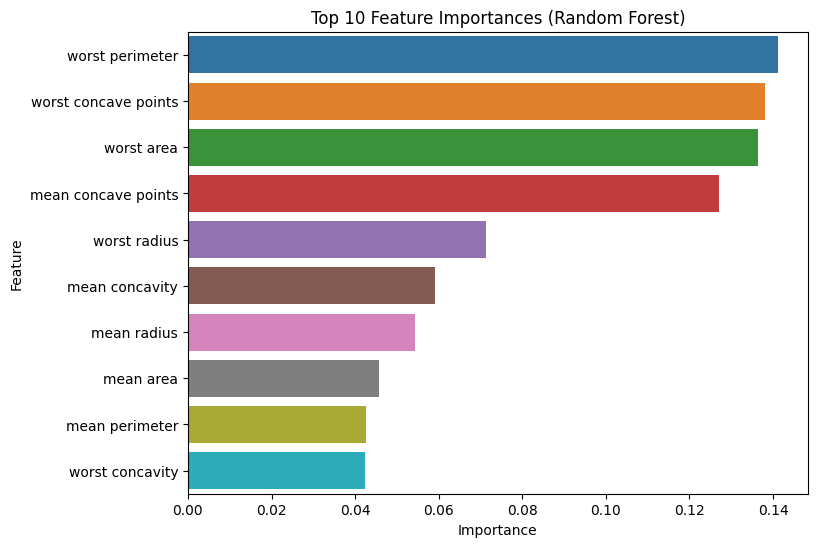

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(10)
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()
